In [1]:
#data manipulation import
import pandas as pd
import numpy as np

#graphs import
import cufflinks as cf
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Tensorflow import
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers

#Sci-kit learn import
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

In [2]:
#Getting all data from csv files
train_df = pd.read_csv('./housing/train.csv')
test_df = pd.read_csv('./housing/test.csv', na_values=['nan'])
test_labels = pd.read_csv('./housing/sample_submission.csv')

In [3]:
#adding labels to test data
test_df = pd.merge(test_df, test_labels, how='left')

In [4]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

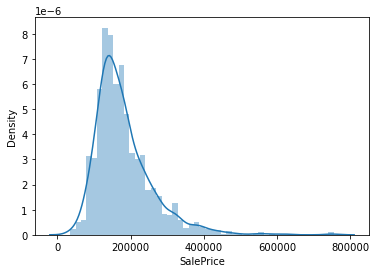

In [5]:
#Distribution of house prices
sns.distplot(train_df['SalePrice'])

In [6]:
#Plotting housing zone to price dependency
data = train_df.groupby(by='MSZoning').SalePrice.mean()
fig = px.bar(x=data.index, y=data.values,
             color=['Commercial', 'Floating Village Residential', 'Residential High Density', 'Residential Low Density',
                    'Residential Medium Density'],
             width=1000,
             height=700,
             labels={
                     "y": "Sale Price Mean",
                     "x": "Zone",
                     "color": "Types of Zones"})
fig.show()

In [7]:
data = train_df.groupby(by='MSSubClass').SalePrice.mean()
fig = px.bar(x=data.index, y=data.values,
             width=1000,
             height=700)
fig.show()

In [8]:
data = train_df.groupby(by='HouseStyle').SalePrice.mean()
fig = px.bar(x=data.index, y=data.values,
             width=1000,
             height=700)
fig.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='YearBuilt', ylabel='Density'>

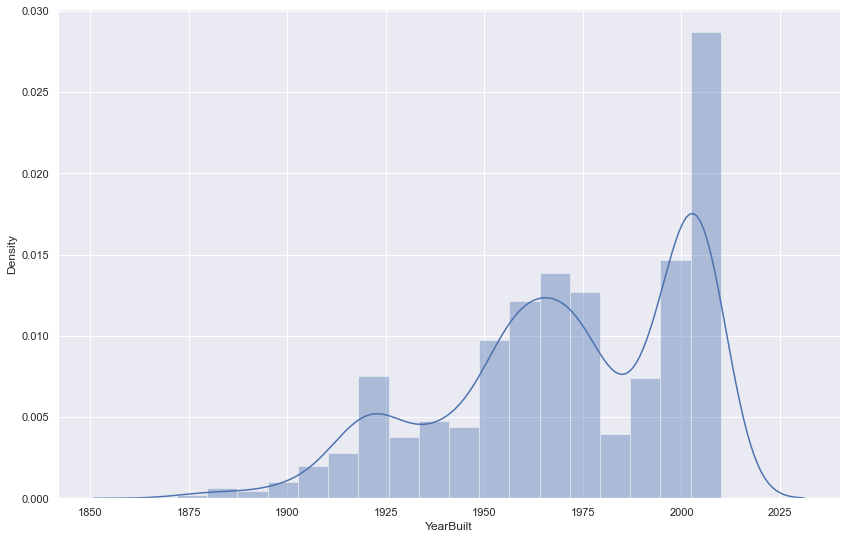

In [9]:
#distribution of houses by YearBuilt
sns.set(rc={'figure.figsize':(14,9)})
sns.distplot(train_df['YearBuilt'])

In [10]:
#Price dependence to Overall Quality of property
data2 = train_df.groupby(by=['OverallQual']).SalePrice.mean()
fig = px.bar(x=data2.index, y=data2.values,
             width=1000,
             height=700,
             labels={
                     "y": "Sale Price Mean",
                     "x": "Overall Quality of Property from 1 to 10"})
fig.show()

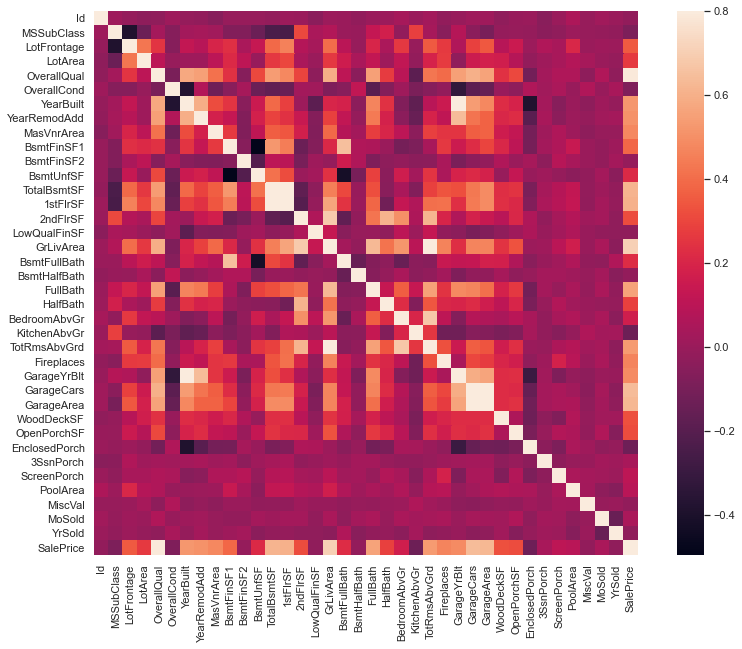

In [11]:
#creating the correlation matrix and correlation plasma soup
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(corrmat, vmax=.8, square=True);

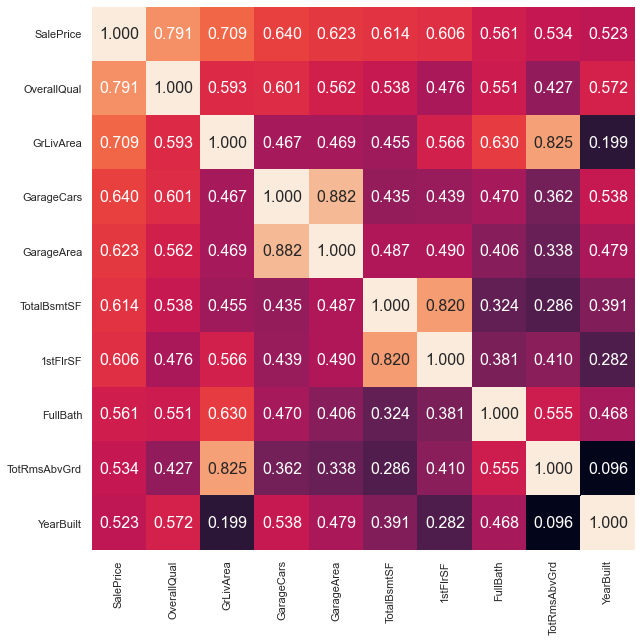

In [12]:
#plasma soup of 10 largest coefficients
top10 = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(14, 10))
cm = np.corrcoef(train_df[top10].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=False, annot=True, square=True, fmt='.3f', annot_kws={'size': 16}, yticklabels=top10.values, xticklabels=top10.values)

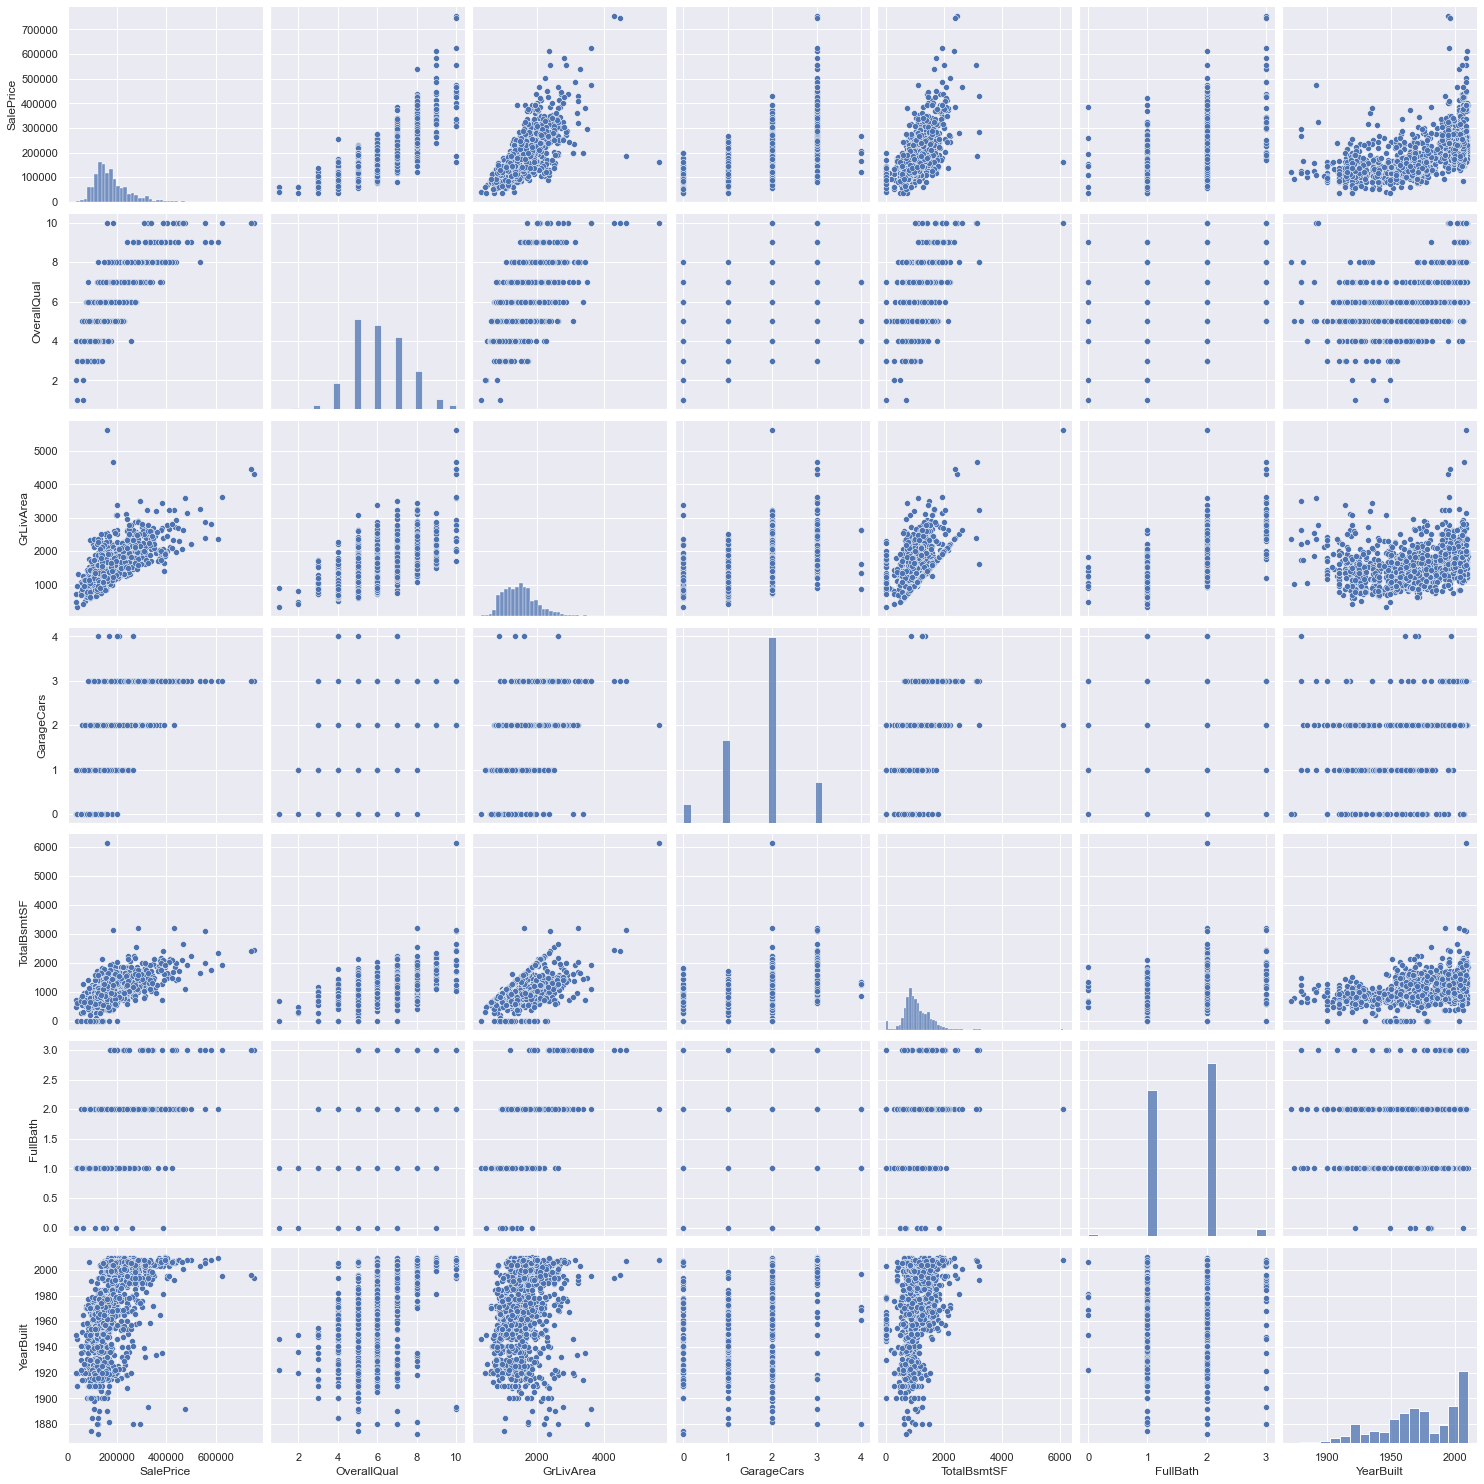

In [13]:
#plotting all of the correlation charts
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], height = 3)
plt.show();

In [14]:
#checking for null values in useful nurmeric columns
train=train_df[['OverallQual', 'GrLivArea', 'GarageCars', '1stFlrSF', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'SalePrice']].copy()
test=test_df[['OverallQual', 'GrLivArea', 'GarageCars', '1stFlrSF', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'SalePrice']].copy()
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1460 non-null   int64
 1   GrLivArea    1460 non-null   int64
 2   GarageCars   1460 non-null   int64
 3   1stFlrSF     1460 non-null   int64
 4   TotalBsmtSF  1460 non-null   int64
 5   FullBath     1460 non-null   int64
 6   YearBuilt    1460 non-null   int64
 7   SalePrice    1460 non-null   int64
dtypes: int64(8)
memory usage: 91.4 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OverallQual  1459 non-null   int64  
 1   GrLivArea    1459 non-null   int64  
 2   GarageCars   1458 non-null   float64
 3   1stFlrSF     1459 non-null   int64  
 4   TotalBsmtSF  1458 non-null   float64
 5   FullBath     1459 non-null   int64  
 6   Yea

In [15]:
test=test.dropna()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1458
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OverallQual  1457 non-null   int64  
 1   GrLivArea    1457 non-null   int64  
 2   GarageCars   1457 non-null   float64
 3   1stFlrSF     1457 non-null   int64  
 4   TotalBsmtSF  1457 non-null   float64
 5   FullBath     1457 non-null   int64  
 6   YearBuilt    1457 non-null   int64  
 7   SalePrice    1457 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 102.4 KB


In [35]:
#Standardizing values in train and test dataframe
column_names=['OverallQual', 'GrLivArea', 'GarageCars', '1stFlrSF', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'SalePrice']

def standardize(dataframe, columns):
    for name in columns:
        dataframe[name] = (dataframe[name] - dataframe[name].mean()) / dataframe[name].std()
    return dataframe

train = standardize(train, column_names)
train2 = train